In [1]:
#Loading necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import missingno as msno
#For standardizing features
from sklearn.preprocessing import StandardScaler
#For K-means and PCA modules
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
import os
os.getcwd()

'C:\\Users\\Gollamudi\\Downloads'

In [3]:
os.chdir("E:\DM&ML\Project\Dataset-3")

In [4]:
#Reading the csv file
df = pd.read_csv('CC GENERAL.csv', index_col=0)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Text(0.5, 1.0, 'Visualisation of Raw data')

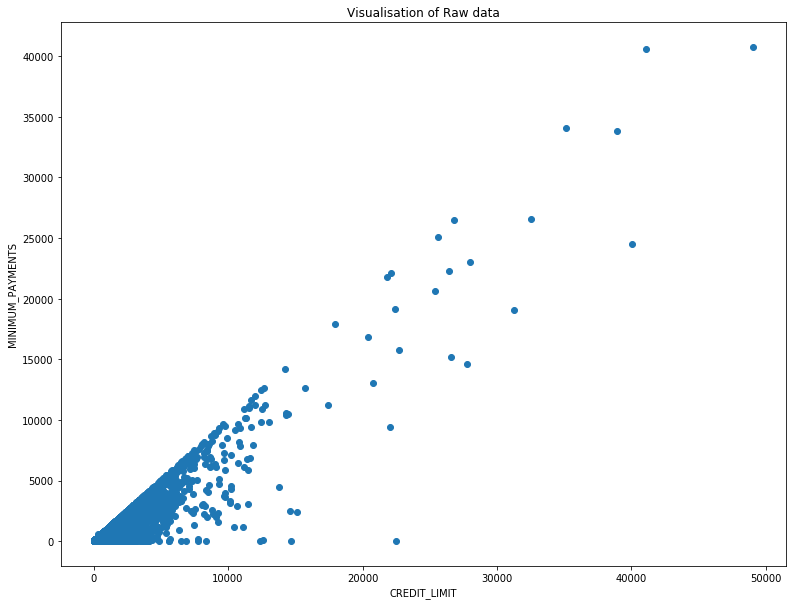

In [5]:
#Visualising the Raw data
plt.figure(figsize=(13,10))
plt.scatter(df.iloc[:,2], df.iloc[:,3])
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('MINIMUM_PAYMENTS')
plt.title('Visualisation of Raw data')

# Data Preprocessing

In [6]:
#Descriptive Statistics of data
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
#Verifying the missing valiues
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

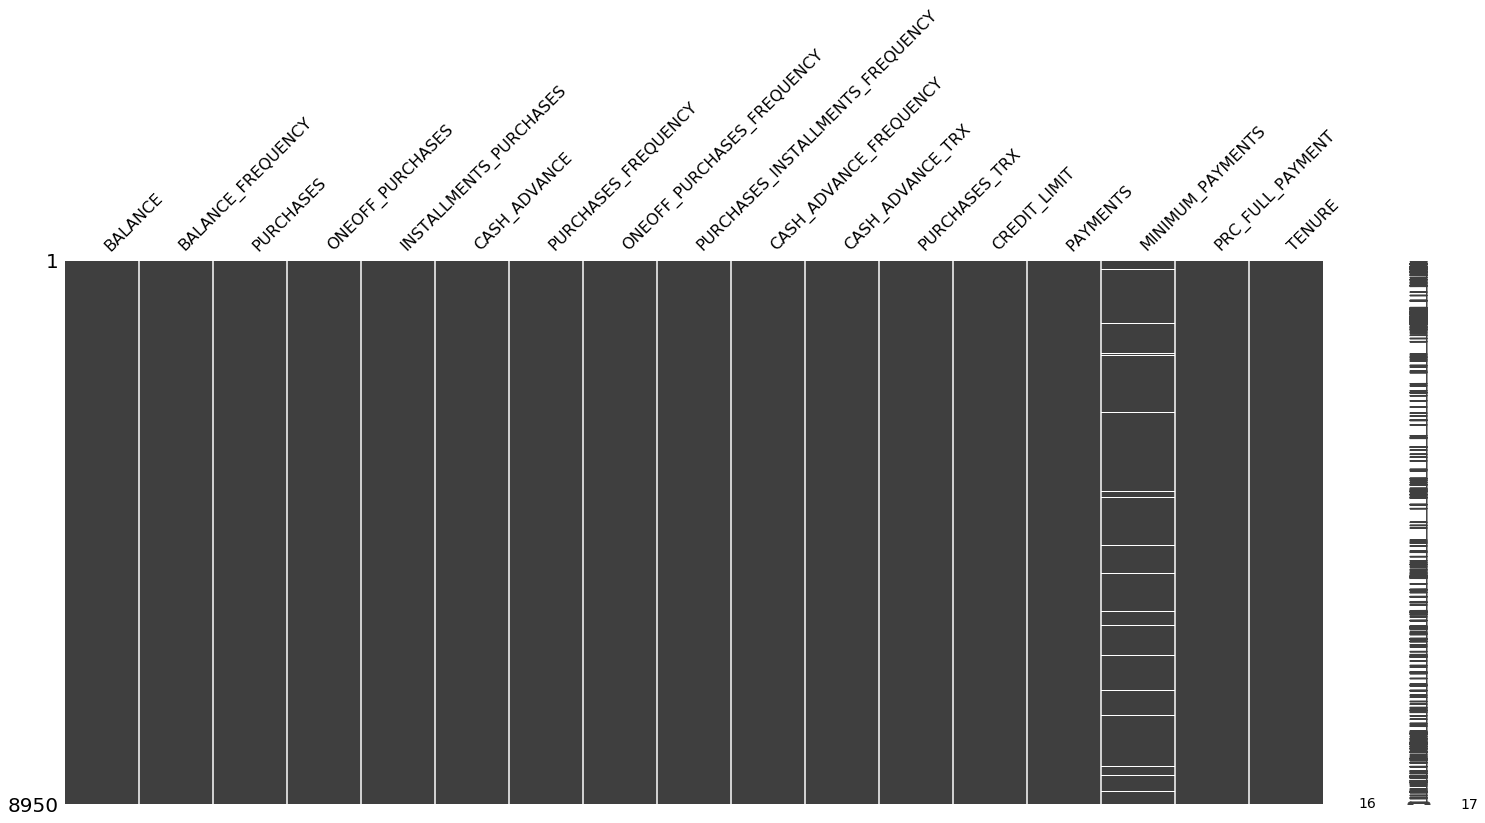

In [8]:
#Visualising the missing values
msno.matrix(df)

In [9]:
#We could see that in the columns credit_limit and minimum payments we have missing value
#Imputing the values with the mean of those respective columns
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True), 'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True), 'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

In [10]:
#No missing values in our data now
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

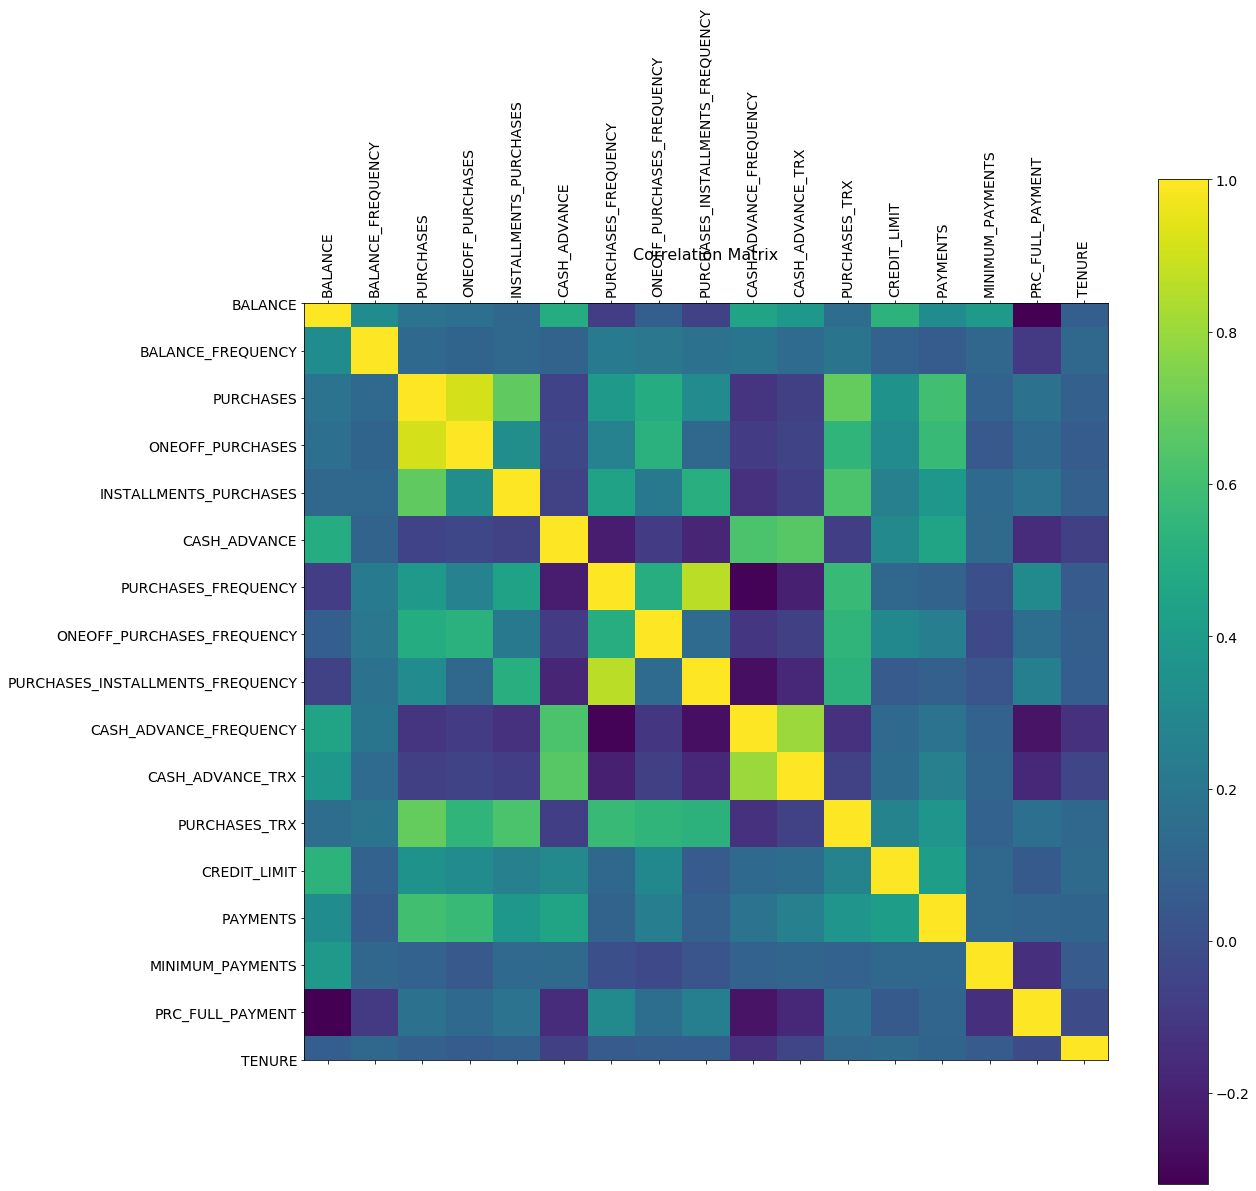

In [11]:
#Correlation verification
f = plt.figure(figsize=(18, 18))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.savefig('Correlation Matrix.png')

In [12]:
#Highly correlated collumns
#PURCHASES, ONEOFF_PURCHASES | PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY | CASH_ADVANCE_FREQENCY, CASH_ADVANCE_TRX

In [13]:
#Will keep any one of the column from these paris and removing the other one
del df['ONEOFF_PURCHASES']
del df['PURCHASES_INSTALLMENTS_FREQUENCY']
del df['CASH_ADVANCE_FREQUENCY']

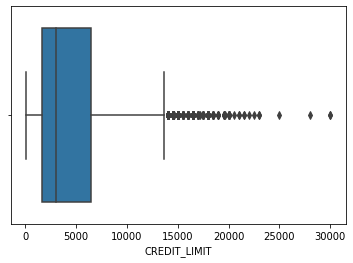

In [14]:
#Verifying the outliers and visualising for some columns
sns.boxplot(x=df['CREDIT_LIMIT'])

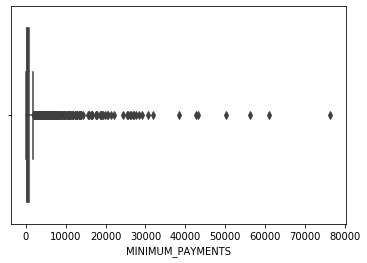

In [15]:
sns.boxplot(x=df['MINIMUM_PAYMENTS'])

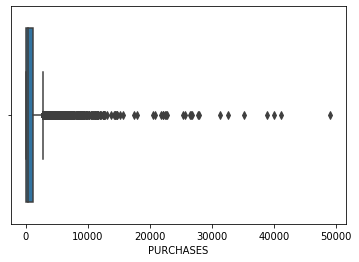

In [16]:
sns.boxplot(x=df['PURCHASES'])

In [17]:
#IQR range to remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

BALANCE                       1925.858120
BALANCE_FREQUENCY                0.111111
PURCHASES                     1070.495000
INSTALLMENTS_PURCHASES         468.637500
CASH_ADVANCE                  1113.821139
PURCHASES_FREQUENCY              0.833334
ONEOFF_PURCHASES_FREQUENCY       0.300000
CASH_ADVANCE_TRX                 4.000000
PURCHASES_TRX                   16.000000
CREDIT_LIMIT                  4900.000000
PAYMENTS                      1517.858151
MINIMUM_PAYMENTS               693.348888
PRC_FULL_PAYMENT                 0.142857
TENURE                           0.000000
dtype: float64


In [18]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

         BALANCE  BALANCE_FREQUENCY  PURCHASES  INSTALLMENTS_PURCHASES  \
CUST_ID                                                                  
C10001     False              False      False                   False   
C10002     False              False      False                   False   
C10003     False              False      False                   False   
C10004     False               True      False                   False   
C10005     False              False      False                   False   
...          ...                ...        ...                     ...   
C19186     False              False      False                   False   
C19187     False              False      False                   False   
C19188     False              False      False                   False   
C19189     False              False      False                   False   
C19190     False               True      False                   False   

         CASH_ADVANCE  PURCHASES_FREQ

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [19]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [20]:
#Datatypes of variables
df.dtypes

BALANCE                       float64
BALANCE_FREQUENCY             float64
PURCHASES                     float64
INSTALLMENTS_PURCHASES        float64
CASH_ADVANCE                  float64
PURCHASES_FREQUENCY           float64
ONEOFF_PURCHASES_FREQUENCY    float64
CASH_ADVANCE_TRX                int64
PURCHASES_TRX                   int64
CREDIT_LIMIT                  float64
PAYMENTS                      float64
MINIMUM_PAYMENTS              float64
PRC_FULL_PAYMENT              float64
TENURE                          int64
dtype: object

In [21]:
#Standardization
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

# Dimensionality reduction using PCA

In [22]:
#Fitting the standardized data using PCA
pca = PCA()
pca.fit(df_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
#Deciding how many features we have to keep based on the cumulative variance plot
#Checking how much variance is explained by each of the 17 variables
pca.explained_variance_ratio_

array([0.28687642, 0.1918213 , 0.11914159, 0.08696413, 0.07351989,
       0.05735259, 0.05432463, 0.04684473, 0.02622256, 0.0227817 ,
       0.01401157, 0.01064494, 0.00949397, 0.        ])

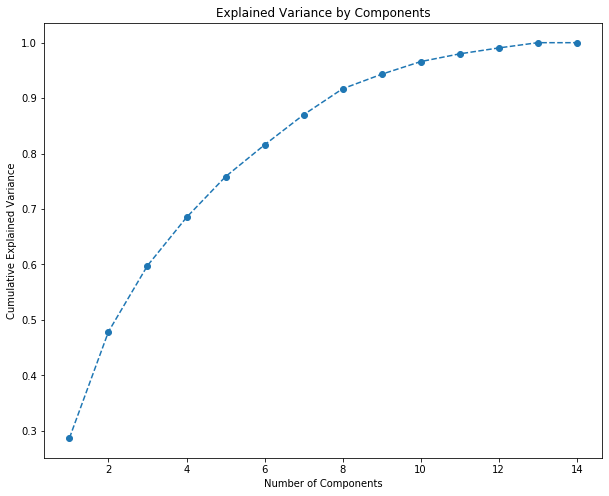

In [24]:
#Visualising the variance ratio
plt.figure(figsize = (10,8))
plt.plot(range(1,15), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.savefig('Cumulative Explained Variance.png')

In [25]:
#From the above plot we need to make sure to preserve 80% of the variance. So, in this we will keep 7 components
#Performing PCA with the choosen number of compnents
pca = PCA(n_components = 7)

In [26]:
#Fitting the model with the selected number of components
pca.fit(df_std)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
#Taking the calculated resulting components scores from our dataset
pca_scores = pca.transform(df_std)
pca_scores

array([[-0.61397124, -2.82977558,  0.22596338, ...,  0.34562928,
         1.81799651,  1.05655247],
       [-1.04407518, -1.45394666, -0.82184052, ..., -0.45399018,
        -0.02893586, -0.65528631],
       [ 1.23667279,  0.10315826, -1.20504418, ...,  1.06912205,
         0.22075893, -0.10619112],
       ...,
       [ 2.52014525, -2.75232847,  2.16147784, ...,  0.67741433,
         0.08907789, -1.10441771],
       [ 0.94501841, -2.73051765,  1.12051612, ...,  0.80074086,
        -0.91853027, -1.6489079 ],
       [ 1.25267635, -0.29669079,  0.13420901, ..., -0.85495727,
        -0.13522493,  0.39265172]])

# KMeans Clustering on newly obtained PCA scores to segment our data and labaling it

In [28]:
#Determining how many number of clusters we need to test in a KMeans algorithm using the Elbow Method
#Using pca_scores our new data
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++')
    kmeans_pca.fit(pca_scores)
    wcss.append(kmeans_pca.inertia_)

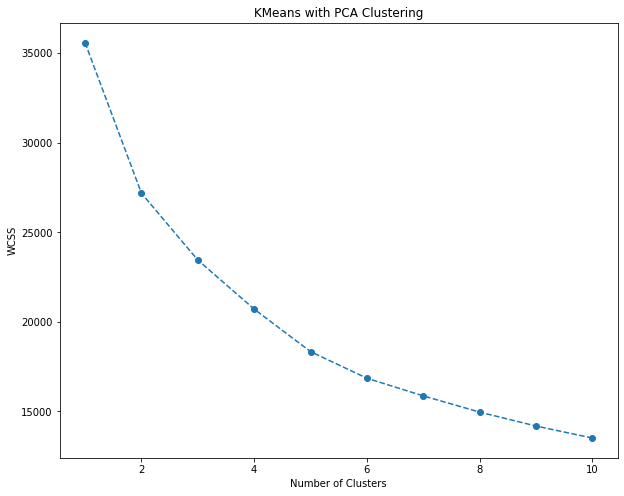

In [29]:
#Plotting the WCSS against the number of components on a graph
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('KMeans with PCA Clustering')
plt.savefig('KMeans with PCA Clustering.png')

In [30]:
#From the graph above we can see that after cluster 4 it is smoother this means that our k is 4
#Applying KMeans with number of clusters 4
kmeans_pca = KMeans(3)
kmeans_pca

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
#Fitting the pca_scores with the kmeans_pca model
kmeans_pca.fit(pca_scores)
labels = kmeans_pca.labels_
labels

array([2, 2, 0, ..., 0, 2, 0])

In [32]:
#Interpretation of Clusters and PCA results
#Creating a data frame with original features and appending the clustering and PCA results to it
df_seg_pca_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
df_seg_pca_kmeans.columns.values[-6: ] = ['Component 1','Component 2','Component 3','Component 4','Component 5','Component 6']#,'Component 7']
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_

In [33]:
df_seg_pca_kmeans

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,...,PRC_FULL_PAYMENT,TENURE,0,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Cluster
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0,2,1000.0,...,0.000000,12,-0.613971,-2.829776,0.225963,0.594309,0.345629,1.817997,1.056552,2
1,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0,1,1200.0,...,0.000000,12,-1.044075,-1.453947,-0.821841,0.300060,-0.453990,-0.028936,-0.655286,2
2,1823.652743,1.000000,436.20,436.20,0.000000,1.000000,0.000000,0,12,2300.0,...,0.000000,12,1.236673,0.103158,-1.205044,-0.912280,1.069122,0.220759,-0.106191,0
3,1014.926473,1.000000,861.49,200.00,0.000000,0.333333,0.083333,0,5,7000.0,...,0.000000,12,0.501062,-0.131656,-0.529873,1.298132,0.577022,-1.097185,0.347469,2
4,630.794744,0.818182,1492.18,0.00,0.000000,0.250000,0.250000,0,6,2000.0,...,0.000000,12,0.970665,-1.357372,0.730451,1.720365,-0.924208,1.925687,0.898234,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,981.286008,1.000000,1370.00,0.00,0.000000,0.083333,0.083333,0,1,1400.0,...,0.000000,12,-0.099165,-0.574565,-0.861116,0.639367,-0.825604,0.244802,-0.617941,2
3142,87.026009,1.000000,605.52,605.52,0.000000,1.000000,0.000000,0,12,1500.0,...,0.000000,12,1.941182,-1.249858,-0.852126,-1.497664,0.612388,-0.242982,0.316067,0
3143,16.428326,0.909091,441.50,316.80,0.000000,1.000000,0.166667,0,14,1000.0,...,0.333333,12,2.520145,-2.752328,2.161478,-0.795749,0.677414,0.089078,-1.104418,0
3144,67.377243,1.000000,295.00,295.00,0.000000,0.500000,0.000000,0,6,1000.0,...,0.300000,12,0.945018,-2.730518,1.120516,-1.006469,0.800741,-0.918530,-1.648908,2


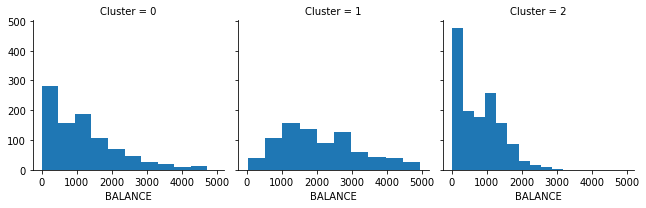

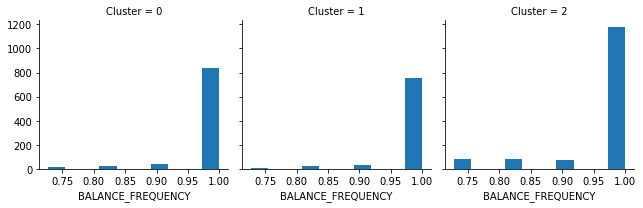

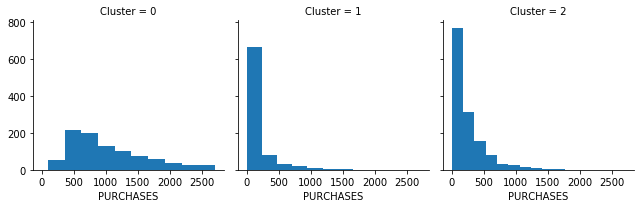

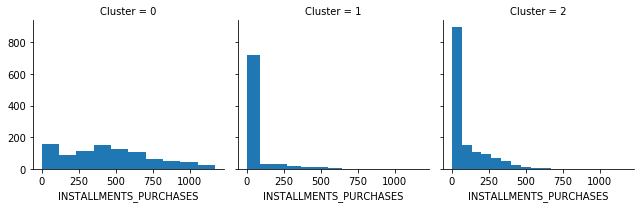

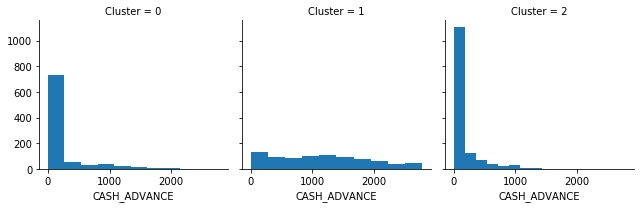

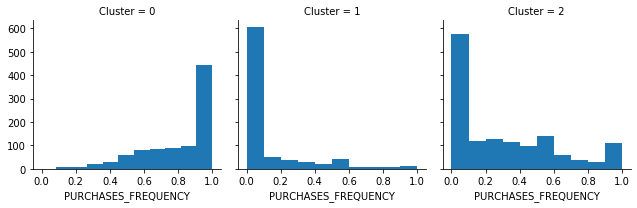

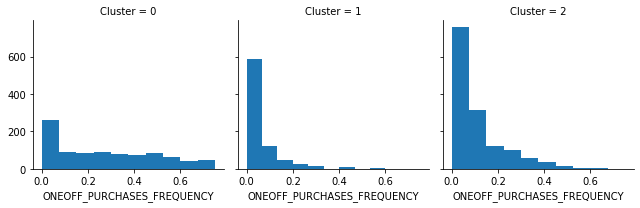

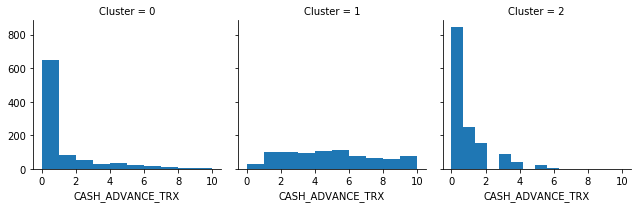

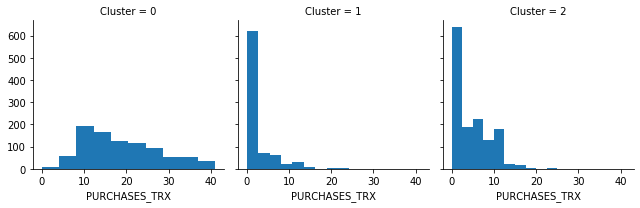

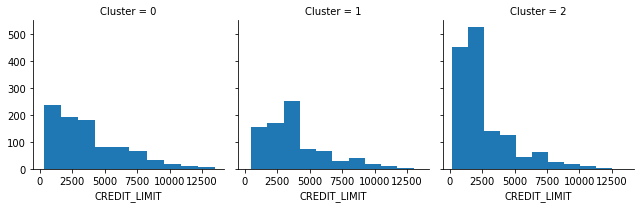

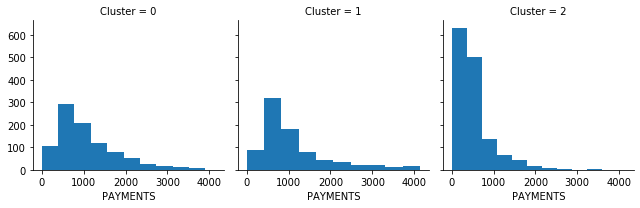

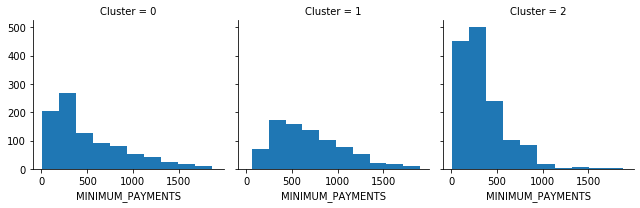

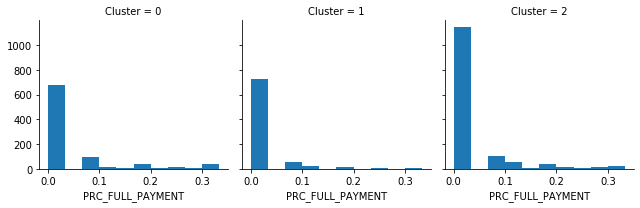

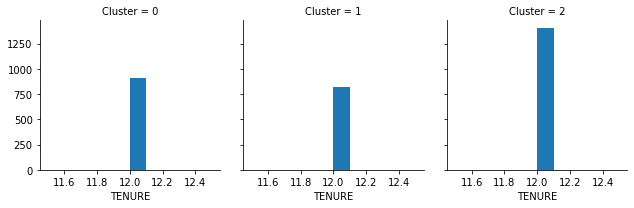

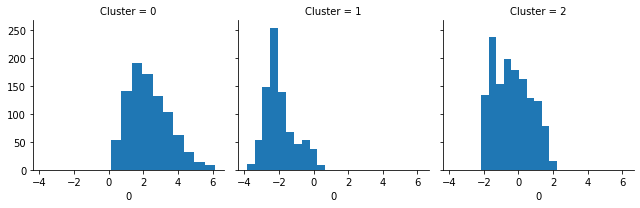

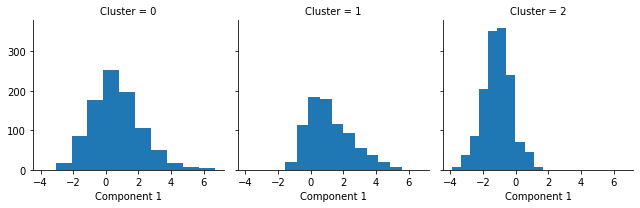

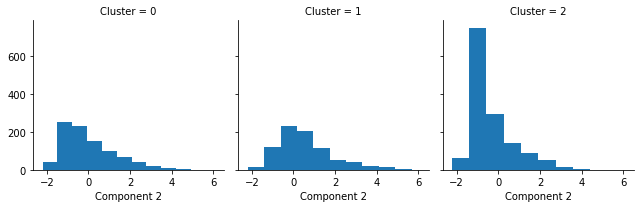

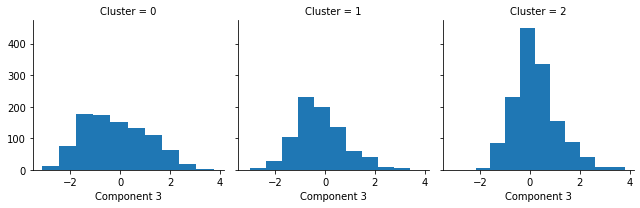

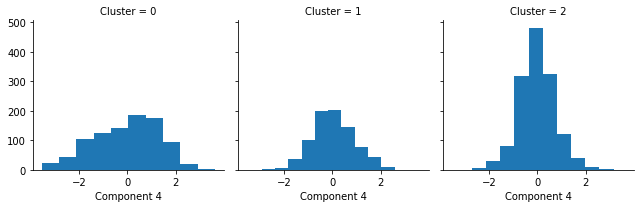

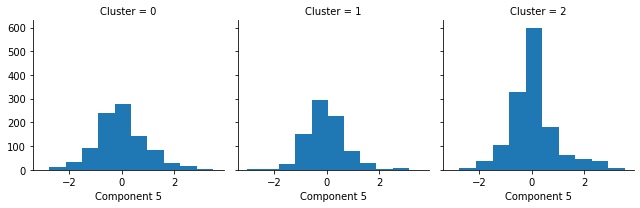

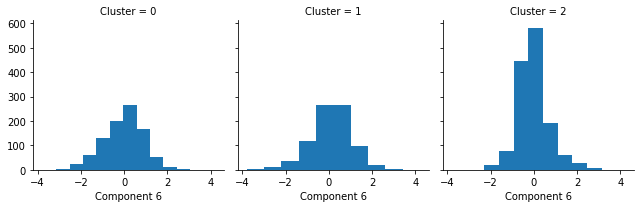

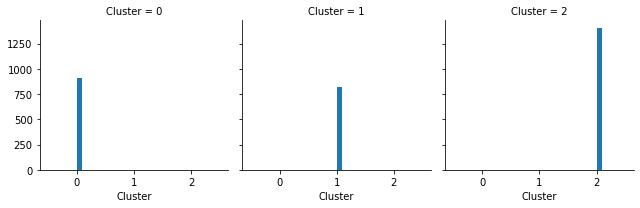

In [34]:
#Interpretation of results
for c in df_seg_pca_kmeans:
    grid = sns.FacetGrid(df_seg_pca_kmeans, col='Cluster')
    grid.map(plt.hist, c)

In [35]:
df_seg_pca_kmeans.groupby('Cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,0,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1163.184605,0.987070,1021.812735,445.183425,194.426742,0.804431,0.266047,0.908096,19.017505,3775.198926,...,508.605519,0.042847,12.0,2.333018,0.656402,0.014727,-0.179165,-0.013590,-0.019383,-0.014178
1,2097.504622,0.988277,135.892786,38.377859,1150.876618,0.118208,0.048256,4.482968,2.024331,3727.007299,...,696.108746,0.014305,12.0,-1.943822,1.174525,0.565443,-0.203695,0.047203,-0.053176,0.084558
2,760.944902,0.969246,228.401383,85.419305,129.388128,0.299764,0.083511,0.828369,4.434752,2594.645390,...,345.116438,0.027828,12.0,-0.379119,-1.110221,-0.339187,0.234889,-0.018709,0.043565,-0.040105


In [36]:
df_seg_pca_kmeans['segclus'] = df_seg_pca_kmeans['Cluster'].map({0:'Customers with less credit limit and midium purchases',
                                                                 1:'Customers with high creidt limit and low purchases',
                                                                    2:'Customers with medium credit limit and high purchases',})

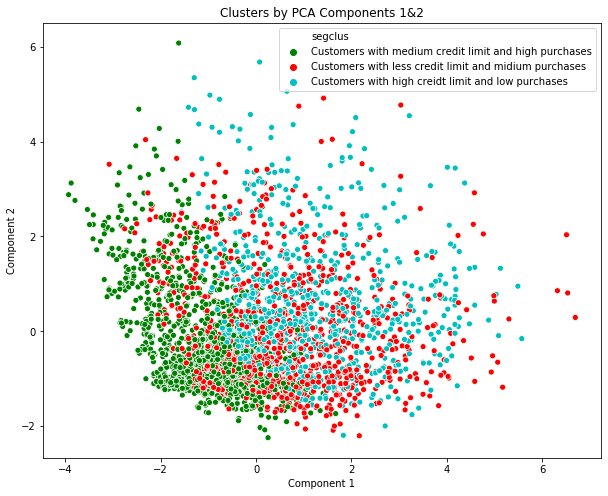

In [37]:
#Visualising the final data
x_axis = df_seg_pca_kmeans['Component 1']
y_axis = df_seg_pca_kmeans['Component 2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=df_seg_pca_kmeans['segclus'], palette=['g','r','c'])
plt.title('Clusters by PCA Components 1&2')
plt.savefig('Clusters by PCA Components 1&2.png')

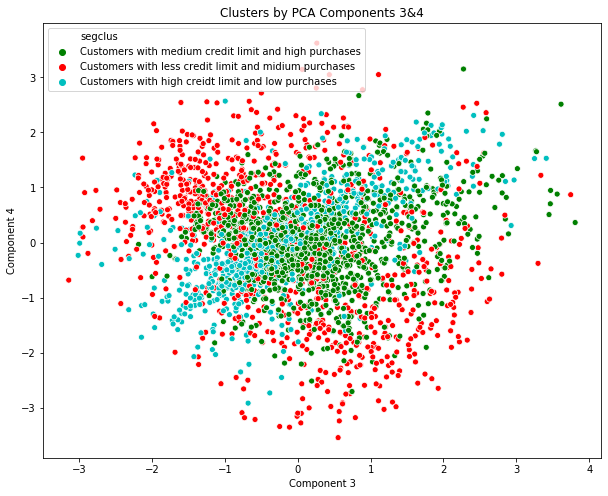

In [38]:
#Visualising the final data
x_axis = df_seg_pca_kmeans['Component 3']
y_axis = df_seg_pca_kmeans['Component 4']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=df_seg_pca_kmeans['segclus'], palette=['g','r','c'])
plt.title('Clusters by PCA Components 3&4')
plt.savefig('Clusters by PCA Components 3&4.png')

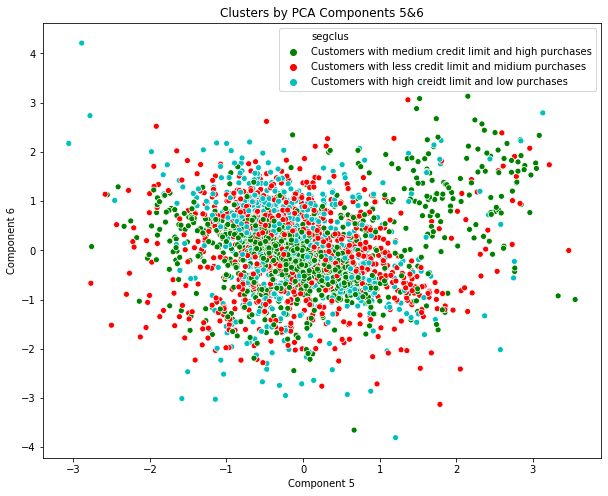

In [39]:
#Visualising the final data
x_axis = df_seg_pca_kmeans['Component 5']
y_axis = df_seg_pca_kmeans['Component 6']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=df_seg_pca_kmeans['segclus'], palette=['g','r','c'])
plt.title('Clusters by PCA Components 5&6')
plt.savefig('Clusters by PCA Components 5&6')